In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read in csv file
game_info_df=pd.read_csv("../data/boardgames_07022021.csv")
# remove duplicate games
game_info_df.drop_duplicates(subset=['objectid'], inplace=True)
# =========================================================================================================
# choose the features based on correlations
game_info_df=game_info_df[['average', 'numwanting', 'siteviews', 'blogs', 'minage', 'news',
                           'podcast', 'totalvotes', 'numcomments', 'numgeeklists', 'weblink']].copy()
# =========================================================================================================
# remove the rows which have invalid values
game_info_df.drop(game_info_df[game_info_df['average'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['totalvotes'] ==0].index, inplace = True)
# drop the null rows
game_info_df.dropna(inplace=True)
game_info_df.head()

,average,numwanting,siteviews,blogs,minage,news,podcast,totalvotes,numcomments,numgeeklists,weblink
0,8.77503,1374,10583753,690,14,8,147,1171,8021,4649,40
1,8.60721,850,3385064,653,13,10,170,668,6552,3978,70
2,8.66981,1477,1816252,208,14,4,28,521,3303,1630,23
3,8.42870,2085,6059031,1473,12,16,163,1800,10034,7276,71
4,8.68957,979,2267902,99,14,3,53,335,2206,1010,23


In [2]:
# Get the general idea about the dataset value range
game_info_df.describe().T

,count,mean,std,min,25%,50%,75%,max
average,20138.0,6.434485,0.938374,1.0,5.86667,6.472555,7.058972,9.5
numwanting,20138.0,43.792879,121.608511,0.0,3.00000,9.000000,30.000000,2085.0
siteviews,20138.0,92644.494091,261624.524627,1431.0,14757.00000,29878.500000,72693.500000,10583753.0
blogs,20138.0,12.260701,45.139607,0.0,0.00000,2.000000,8.000000,1473.0
minage,20138.0,9.598073,3.710556,0.0,8.00000,10.000000,12.000000,25.0
news,20138.0,0.580197,1.396812,0.0,0.00000,0.000000,1.000000,37.0
podcast,20138.0,2.137899,8.391469,0.0,0.00000,0.000000,1.000000,588.0
totalvotes,20138.0,16.454067,66.393870,1.0,2.00000,3.000000,9.000000,2108.0
numcomments,20138.0,219.157364,676.344229,0.0,23.00000,53.000000,146.000000,18840.0
numgeeklists,20138.0,259.978101,1183.245497,0.0,24.00000,63.000000,195.000000,136869.0


## Select features, Create Train Test Split, Scale the data

In [3]:
# Set features (X) and target (y)
y=game_info_df['average']
X=game_info_df.drop(['average'],axis=1)

# Scale the data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X)
X_scaled = X_scaler.transform(X)

X_scaled.shape, y.shape

((20138, 10), (20138,))

## RandomeForestRegressor

In [4]:
from sklearn.ensemble import RandomForestRegressor
 # Create a random forest regressor, default n_estimators=100, criterion="mse", max_depth="None"
rf = RandomForestRegressor()
rf = rf.fit(X_scaled, y)
print(f"Training Data Score: {rf.score(X_scaled, y):.5f}")

Training Data Score: 0.93199


<IPython.core.display.Javascript object>


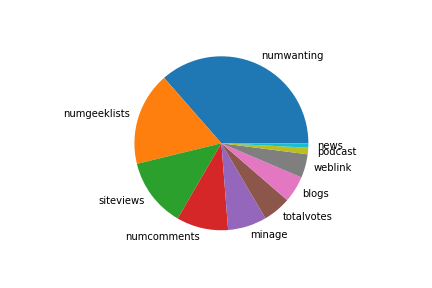

[(0.3645178617216192, 'numwanting'),
 (0.1735327841479357, 'numgeeklists'),
 (0.12812307168104375, 'siteviews'),
 (0.09615824810399386, 'numcomments'),
 (0.0721890053043631, 'minage'),
 (0.05207216880276996, 'totalvotes'),
 (0.0491683592108478, 'blogs'),
 (0.0439874471116339, 'weblink'),
 (0.012258514773549552, 'podcast'),
 (0.007992539142243153, 'news')]

In [18]:
importances = rf.feature_importances_
feature_names=X.columns
rf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
fig1 = plt.figure()
#add subplots
ax = fig1.add_subplot(111)
ax.pie([a[0] for a in rf_feature_importance],labels=[a[1] for a in rf_feature_importance],normalize=True)
plt.show()
rf_feature_importance

In [20]:
fig1.savefig("feature.svg", dpi=150)
fig1.savefig("feature.png", dpi=150)

In [25]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [20,50,100,200,500,1000]}

grid = GridSearchCV(rf, param_grid, verbose=3, scoring="neg_mean_squared_error",return_train_score=True)

# Train the model with GridSearch
grid.fit(X_scaled, y)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END n_estimators=20;, score=(train=-0.082, test=-0.325) total time=   1.0s
[CV 2/5] END n_estimators=20;, score=(train=-0.077, test=-0.420) total time=   1.0s
[CV 3/5] END n_estimators=20;, score=(train=-0.069, test=-0.611) total time=   1.0s
[CV 4/5] END n_estimators=20;, score=(train=-0.074, test=-0.480) total time=   1.0s
[CV 5/5] END n_estimators=20;, score=(train=-0.041, test=-1.610) total time=   1.0s
[CV 1/5] END n_estimators=50;, score=(train=-0.073, test=-0.317) total time=   2.5s
[CV 2/5] END n_estimators=50;, score=(train=-0.067, test=-0.409) total time=   2.6s
[CV 3/5] END n_estimators=50;, score=(train=-0.062, test=-0.587) total time=   2.8s
[CV 4/5] END n_estimators=50;, score=(train=-0.065, test=-0.464) total time=   2.8s
[CV 5/5] END n_estimators=50;, score=(train=-0.036, test=-1.597) total time=   2.7s
[CV 1/5] END n_estimators=100;, score=(train=-0.070, test=-0.305) total time=   5.1s
[CV 2/5] END n_

In [29]:
print(grid.best_params_)
print(grid.best_score_)

{'n_estimators': 500}
-0.6651716435210183


In [26]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

# get the model predictions
predictions = grid.predict(X_scaled)

print(f"Grid Best Explained Variance Score: {explained_variance_score(y, predictions):.5f}")
print(f"Grid Best R2 Score: {r2_score(y, predictions):.5f}")

Grid Best Explained Variance Score: 0.93451
Grid Best R2 Score: 0.93450


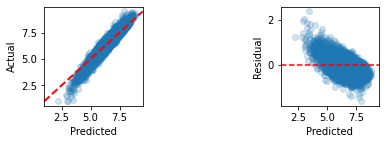

In [27]:
%matplotlib inline

fig = plt.figure()
#add subplots
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(233)
# Plot predictions vs actual values
ax1.scatter(predictions, y,alpha=0.2)
ax1.plot([y.min(), y.max()],[y.min(), y.max()],'--r', linewidth=2)
ax1.set_xlim([y.min(), y.max()])
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
# Plot Residuals
ax2.scatter(predictions, predictions - y,alpha=0.2)
ax2.hlines(y=0, xmin=y.min(), xmax=y.max(),colors="r", linestyles='dashed', )
ax2.set_xlim([y.min(), y.max()])
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Residual')
plt.show()

In [28]:
fig.savefig("rf.svg", dpi=150)
fig.savefig("rf.png", dpi=150)